In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
def swap(a,b):
  return b,a
def four1(data, nn, isign): 
  n= nn<< 1
  j = 1
  for i in range(1,n,2):
    if j > i:
      data[j], data[i]= swap(data[j], data[i])
      data[j+1], data[i+1]= swap(data[j+1], data[i+1])
    m = nn 
    while (m >= 2 and j > m):
      j -= m
      m>>= 1
    j+= m
  mmax= 2
  while (n> mmax):
    istep = mmax << 1
    theta = isign*(6.28318530717959/mmax)
    wtemp = np.sin(.5*theta)
    wpr = -2.0*wtemp**(2)
    wpi = np.sin(theta)
    wr = 1.0 
    wi = 0.0 
    for k in range(1, mmax, 2):
      for i in range(k, n, istep):
        j= i + mmax 
        tempr = wr*data[j]-wi*data[j+1]
        tempi = wr*data[j+1]+ wi*data[j]
        data[j] = data[i] -  tempr
        data[j+1]= data[i+1] - tempi  
        data[i] += tempr 
        data[i+1] += tempi 
      wtemp= wr 
      wr = (wtemp)* wpr- wi*wpi + wr
      wi = wi*wpr + wtemp* wpi + wi 
    mmax= istep
  return data

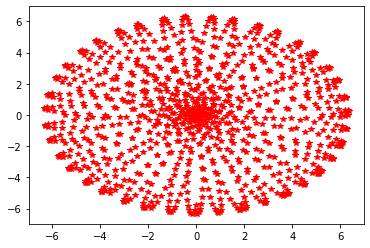

In [3]:
import matplotlib.pyplot as plt
t= np.linspace(0, 100, 1000)
def euler(t):
  return complex(np.cos((-2*np.pi*t)*.5), np.sin((-2*np.pi*t)*.5))
for i in range(1000):
  plt.plot(6.35*np.sin(t[i]+1.5)*euler(t[i]).real, 6.35*np.sin(t[i]+1.5)*euler(t[i]).imag, '-r*')

plt.show()


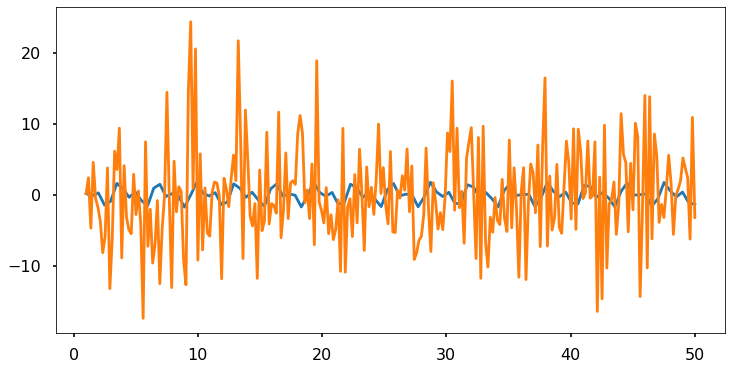

In [21]:
n= np.linspace(1,50, 100)
def sig(t):
  return (np.sin(2*t)+np.sin(4*t))
array= np.zeros(300)
array1= sig(n)

for i in range(100):
  array[2*i]= array1[i]
arr= four1(array, 100, 1)
arr1= np.zeros(257)
j= 0
for i in range(0,300):
  if arr[i]== 0:
    continue 
  arr1[j]= arr[i]
  j+= 1
plt.figure(figsize = (12, 6))
plt.plot(n, array1)
n= np.linspace(1,50, arr1.size)
plt.plot(n, arr1)

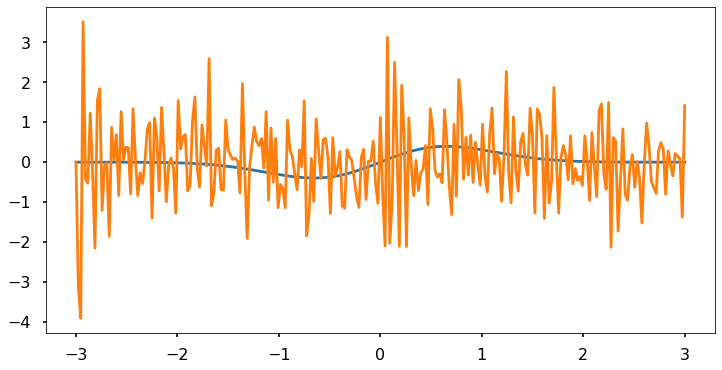

In [20]:
n= np.linspace(-3,3, 100)
def fun(t):
  return (np.exp(-t**(2))*np.sin(t))
array= np.zeros(300)
array1= fun(n)
for i in range(50):
  array[2*i]= array1[i]
arr= four1(array, 100, 1)
arr1= np.zeros(257)
j= 0
for i in range(0,300):
  if arr[i]== 0:
    continue 
  arr1[j]= arr[i]
  j+= 1
plt.figure(figsize = (12, 6))
plt.plot(n, array1)
n= np.linspace(-3,3, arr1.size)
plt.plot(n, arr1)

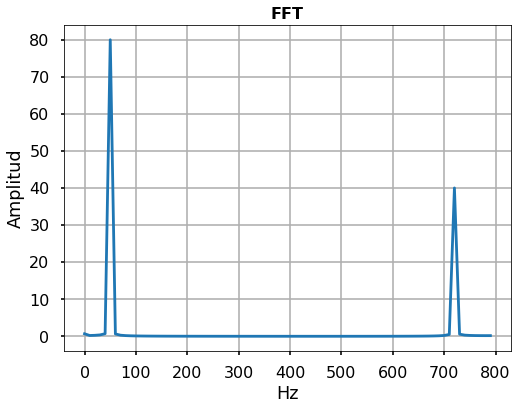

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

N = 600           
Fs = 800.0
T = 1.0 / Fs      
N_fft = 80        
x = np.linspace(0, N*T, N)     
y = np.exp(50.0 * 1.j * 2.0*np.pi*x) + 0.5*np.exp(-80.0 * 1.j * 2.0*np.pi*x)


mean_removed = np.ones_like(y)*np.mean(y)
y = y - mean_removed

yf = scipy.fftpack.fft(y,n=N_fft)
xf = np.arange(0,Fs,Fs/N_fft)

plt.figure(figsize = (8, 6))
ax = plt.subplot()
pt = ax.plot(xf,np.abs(yf))
ax.set_xlim(ax.get_xlim()[0])
ax.set_title('FFT', fontsize= 16, fontweight="bold")
ax.set_ylabel('Amplitud')
ax.set_xlabel('Hz')
ax.grid()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


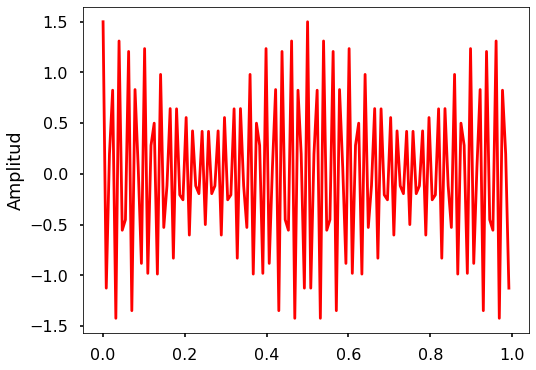

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


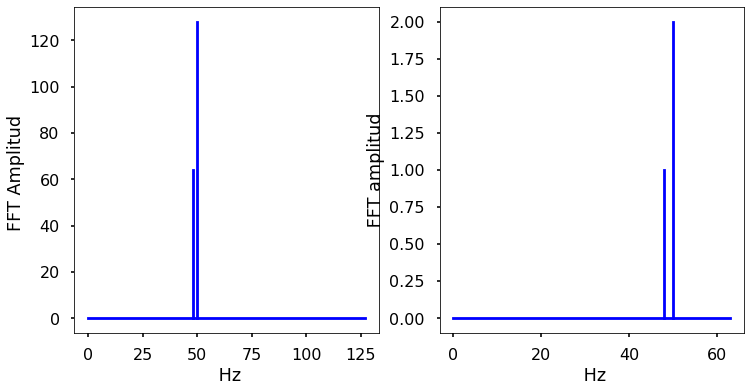

In [31]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-poster')
%matplotlib inline
def FFT(x):
    N = len(x)
    if N == 1:
        return x
    else:
        X_par = FFT(x[::2])
        X_non = FFT(x[1::2])
        factor = \
              np.exp(-2j*np.pi*np.arange(N)/ N)
        
        X = np.concatenate(\
            [X_par+factor[:int(N/2)]*X_non,
             X_par+factor[int(N/2):]*X_non])
        return X
sr = 128
ts = 1.0/sr
t = np.arange(0,1,ts)
frec = 1.0
x= np.exp(50.0 * 1.j * 2.0*np.pi*t) + 0.5*np.exp(-80.0 * 1.j * 2.0*np.pi*t)
plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitud')

plt.show()
X=FFT(x)
N = len(X)
n = np.arange(N)
T = N/sr
frec = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel(' Hz')
plt.ylabel('FFT Amplitud ')
n_lado = N//2

f_lado = freq[:n_lado]
X_lado =X[:n_lado]/n_lado
plt.subplot(122)
plt.stem(f_lado, abs(X_lado), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel(' Hz')
plt.ylabel(' FFT amplitud ')
plt.show()